<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9D%D0%B0%D1%85%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BD%D1%82%D1%83%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нахождение контуров

# Finding contours


В этом уроке мы научимся находить контуры изображений


In this lesson we will learn how to find the contours of images


Делать мы это будем при помощи встроенной в opencv функции **findContours()**


We will do this using the **findContours()** function built into opencv

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_25.Find_contours.zip
!unzip Lesson_25.Find_contours.zip
%cd /content/Lesson_25.Find_contours

--2022-02-02 18:08:41--  http://dataudt.ru/datasets/cv/Lesson_25.Find_contours.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4257 (4.2K) [application/zip]
Saving to: ‘Lesson_25.Find_contours.zip’

Lesson_25.Find_cont 100%[===================>]   4.16K  --.-KB/s    in 0s      

2022-02-02 18:08:42 (61.9 MB/s) - ‘Lesson_25.Find_contours.zip’ saved [4257/4257]

Archive:  Lesson_25.Find_contours.zip
  inflating: Lesson_25.Find_contours/Find_contours.py  
  inflating: Lesson_25.Find_contours/shapes_01.png  
/content/Lesson_25.Find_contours


In [2]:
# импортируем необходимые модули
# import the necessary packages
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow

In [3]:
# создаем отдельный словарь с аргументами 
# create a separate dictionary with arguments 
args = {
# путь к входному изображению 
# the path to the input image
'image':'shapes_01.png', 
}

Original


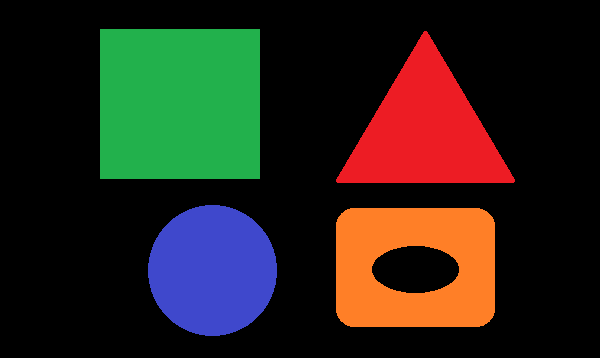

In [6]:
# загружаем изображение и конвертируем его в градации серого
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# отобразим исходное изображение
# show the original image
print("Original") 
cv2_imshow(image)

Found 5 contours
All Contours


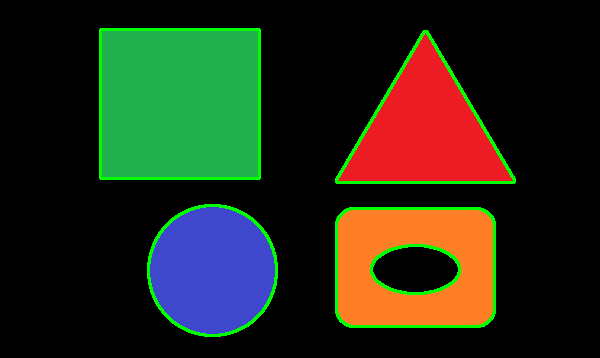

In [7]:
# находим все контуры на изображении 
# и рисуем ВСЕ контуры на изображении
# find all contours in the image and draw ALL contours on the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)# функция  изменяет входное изображение  поэтому,
                                                                            # если вы хотите снова использовать входное изображение, 
                                                                            # то обязательно сделайте копию
                                                                            # function changes the input image so,
                                                                            # if you want to use the input image again, 
                                                                            # be sure to make a copy of
cnts = imutils.grab_contours(cnts)
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print("Found {} contours".format(len(cnts)))

# покажем получившееся изображение
# show the output image
print("All Contours") 
cv2_imshow(clone)

Drawing contour #1
Single Contour


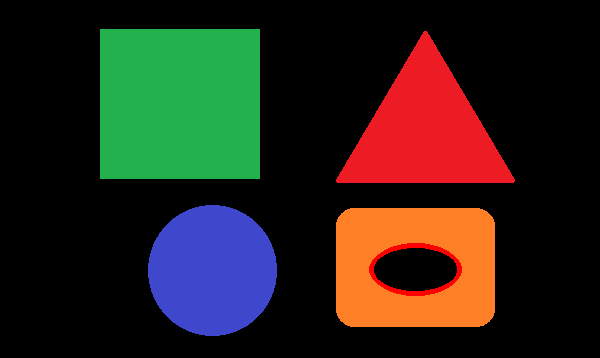

Drawing contour #2
Single Contour


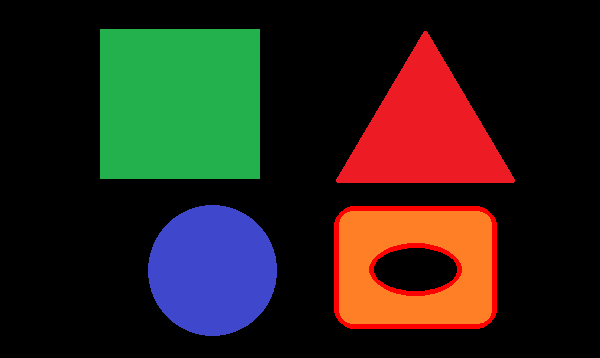

Drawing contour #3
Single Contour


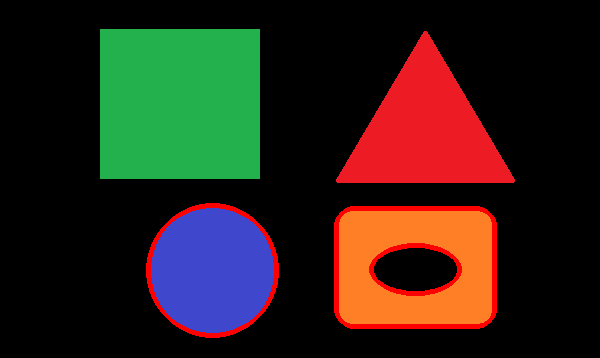

Drawing contour #4
Single Contour


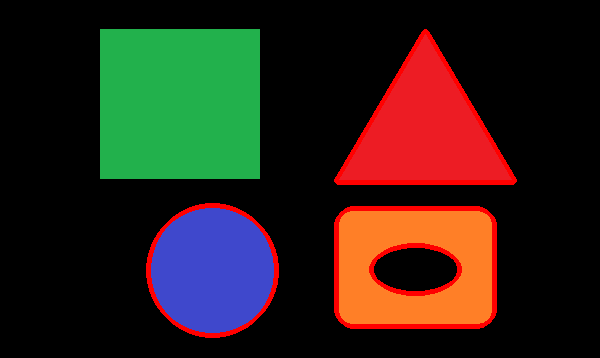

Drawing contour #5
Single Contour


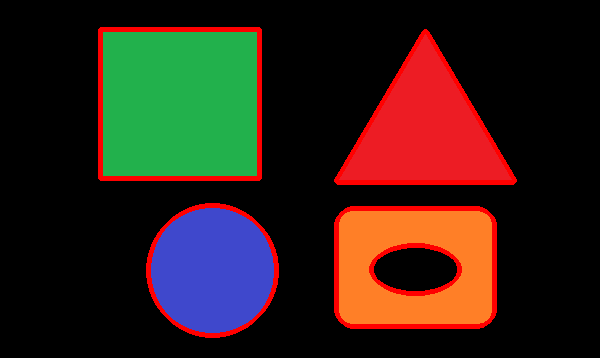

In [10]:
# повторно клонируем изображение 
# re-clone the image 
clone = image.copy()

# перебираем контуры отдельно и рисуем каждый из них
# loop over the contours individually and draw each of them
for (i, c) in enumerate(cnts):
    print("Drawing contour #{}".format(i + 1))
    cv2.drawContours(clone, [c], -1, (0, 0, 255), 3)
    print("Single Contour") 
    cv2_imshow(clone)

Found 4 EXTERNAL contours
All Contours


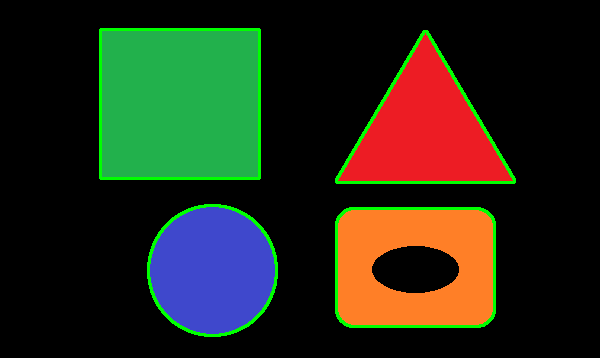

In [11]:
# повторно клонируем изображение 
# re-clone the image 
clone = image.copy()

# найдём контуры на изображении, но на этот раз 
# оставим только ВНЕШНИЕ контуры на изображении
# find contours in the image, but this time keep only the EXTERNAL
# contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
cnts = imutils.grab_contours(cnts) 
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print("Found {} EXTERNAL contours".format(len(cnts)))

# покажем выходное изображение
# show the output image
print("All Contours") 
cv2_imshow(clone)

Image


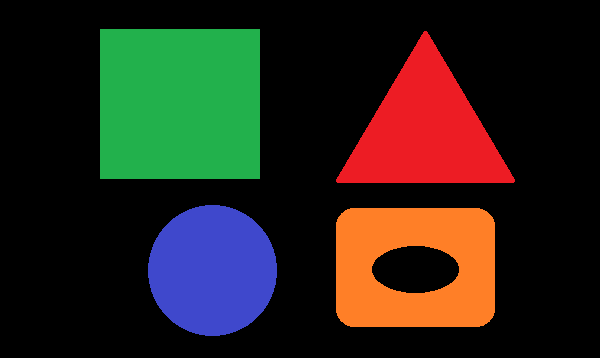

Mask


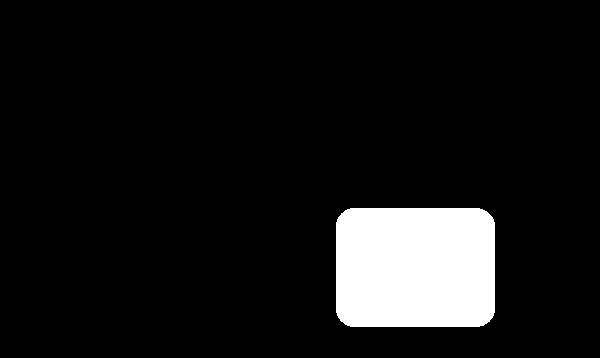

Image + Mask


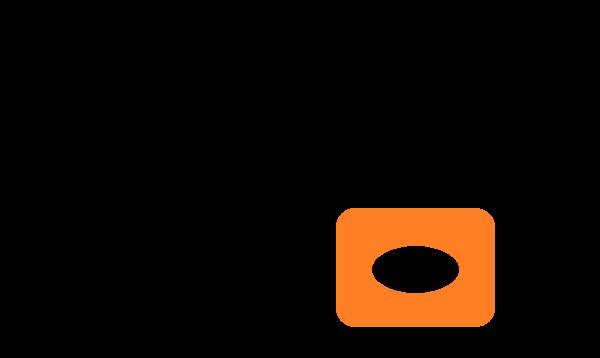

Image


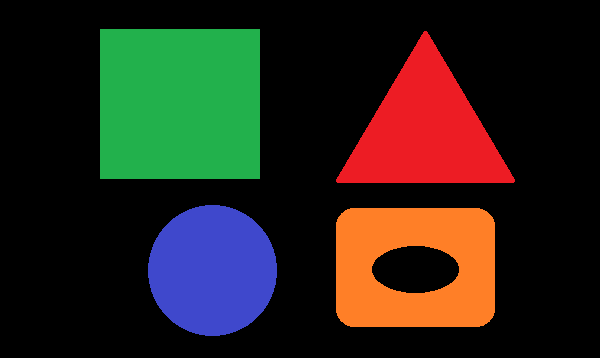

Mask


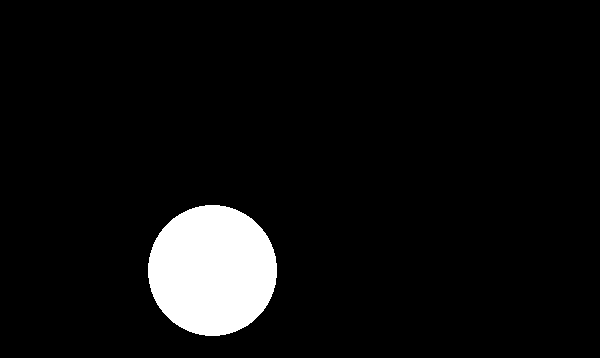

Image + Mask


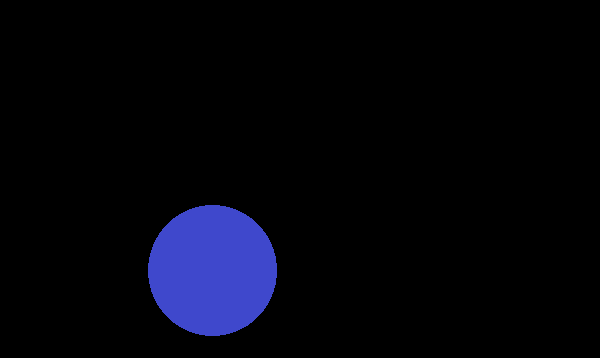

Image


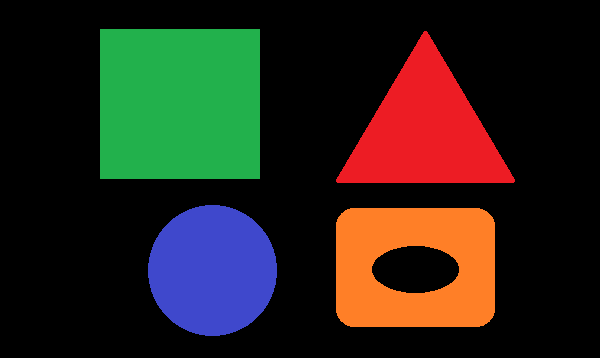

Mask


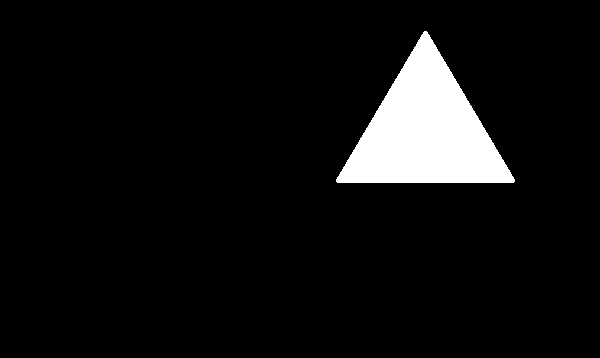

Image + Mask


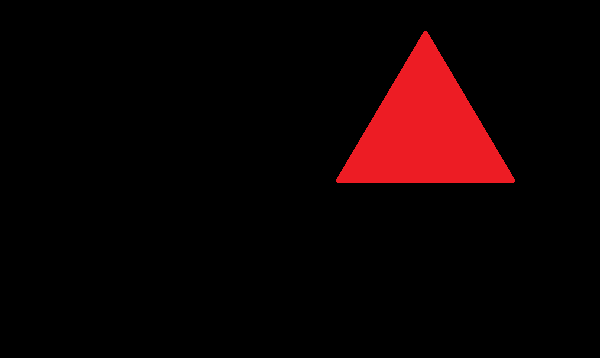

Image


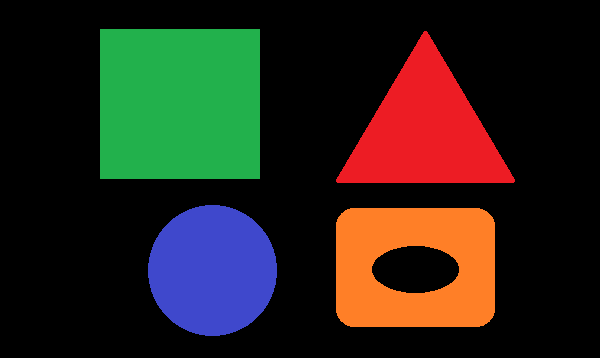

Mask


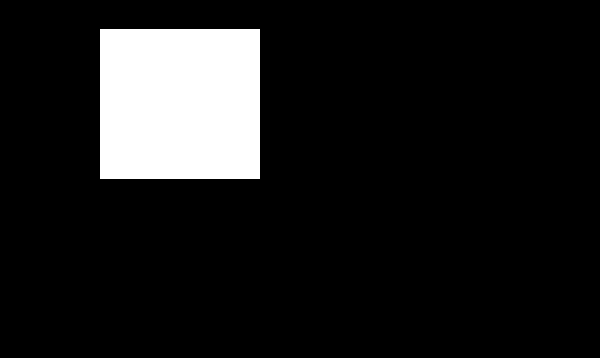

Image + Mask


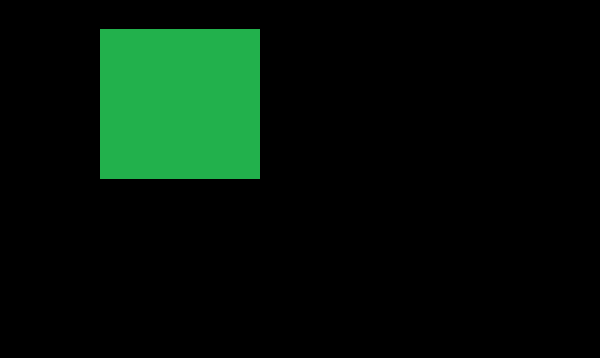

In [12]:
# повторно клонируем изображение 
# re-clone the image 
clone = image.copy()

# перебираем контуры каждый отдельно
# loop over the contours individually
for c in cnts:
    # создадим маску, нарисовав только текущий контур
    # construct a mask by drawing only the current contour
    mask = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)

    # отобразим изображения
    # show the images
    print("Image") 
    cv2_imshow(image)

    print("Mask") 
    cv2_imshow(mask)

    print("Image + Mask")
    cv2_imshow(cv2.bitwise_and(image, image, mask=mask))